# clustering 

In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

import warnings
warnings.filterwarnings('ignore')

In [70]:
# 데이터 로드 
df = pd.read_csv("master_cluster.csv")
df

matchId  win  championName_Aatrox  championName_Ahri  \
0      KR_4870274470    0                  0.0                0.0   
1      KR_4870274470    1                  0.0                0.0   
2      KR_4901175026    0                  0.0                0.0   
3      KR_4901175026    1                  0.0                0.0   
4      KR_4944273316    0                  0.0                0.0   
...              ...  ...                  ...                ...   
51293  KR_5560972397    1                  0.0                0.0   
51294  KR_5560981091    0                  0.0                0.0   
51295  KR_5560981091    1                  0.0                0.0   
51296  KR_5560981811    0                  0.0                0.0   
51297  KR_5560981811    1                  0.0                0.0   

       championName_Akali  championName_Akshan  championName_Alistar  \
0                     0.0                  0.0                   0.0   
1                     0.0                  0.0                   0.0   
2                     0.0                  0.0                   0.0   
3                     0.2                  0.0                   0.0   
4                     0.0                  0.0                   0.2   
...                   ...                  ...                   ...   
51293                 0.0                  0.0                   0.0   
51294                 0.0                  0.0                   0.0   
51295                 0.0                  0.0                   0.0   
51296                 0.0                  0.0                   0.2   
51297                 0.0                  0.0                   0.0   

       championName_Amumu  championName_Anivia  championName_Annie  ...  \
0                     0.0                  0.0                 0.0  ...   
1                     0.0                  0.0                 0.0  ...   
2                     0.0                  0.0                 0.0  ...   
3                     0.0                  0.0                 0.0  ...   
4                     0.0                  0.0                 0.0  ...   
...                   ...                  ...                 ...  ...   
51293                 0.2                  0.0                 0.0  ...   
51294                 0.0                  0.0                 0.0  ...   
51295                 0.0                  0.0                 0.0  ...   
51296                 0.0                  0.0                 0.0  ...   
51297                 0.0                  0.0                 0.0  ...   

       championName_Zed  championName_Ziggs  championName_Zilean  \
0                   0.0                 0.0                  0.0   
1                   0.0                 0.0                  0.0   
2                   0.0                 0.0                  0.0   
3                   0.0                 0.0                  0.0   
4                   0.0                 0.0                  0.0   
...                 ...                 ...                  ...   
51293               0.0                 0.0                  0.0   
51294               0.0                 0.0                  0.0   
51295               0.0                 0.0                  0.2   
51296               0.0                 0.2                  0.0   
51297               0.0                 0.0                  0.0   

       championName_Zoe  championName_Zyra  teamId  \
0                   0.0                0.0     200   
1                   0.0                0.0     100   
2                   0.0                0.0     100   
3                   0.0                0.0     200   
4                   0.0                0.0     100   
...                 ...                ...     ...   
51293               0.0                0.0     200   
51294               0.2                0.0     200   
51295               0.0                0.0     100   
51296               0.0                0.0     200   
51297  

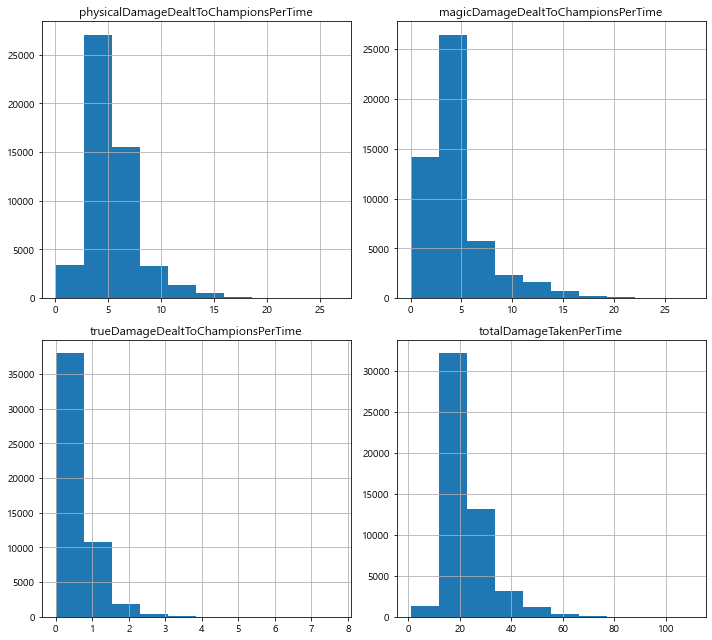

In [71]:
# 시각화할 변수만 선택
df[['physicalDamageDealtToChampionsPerTime',
       'magicDamageDealtToChampionsPerTime',
       'trueDamageDealtToChampionsPerTime',
        'totalDamageTakenPerTime']].hist(figsize=(10,9))
plt.tight_layout()
plt.show()

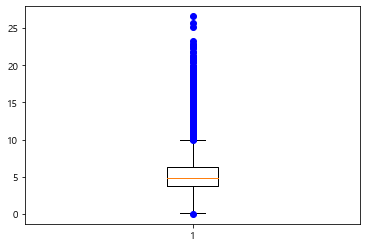

In [72]:
# 데이터 값이 한쪽으로 치중되어 있는지 확인
fig, ax = plt.subplots()
ax.boxplot([df['physicalDamageDealtToChampionsPerTime']], sym = 'bo') 
plt.show()

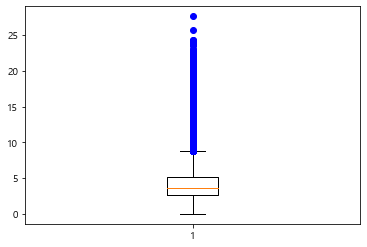

In [73]:
fig, ax = plt.subplots()
ax.boxplot([df['magicDamageDealtToChampionsPerTime']], sym = 'bo') 
plt.show()

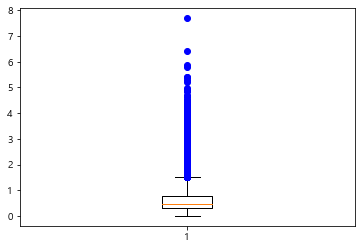

In [74]:
fig, ax = plt.subplots()
ax.boxplot([df['trueDamageDealtToChampionsPerTime']], sym = 'bo') 
plt.show()

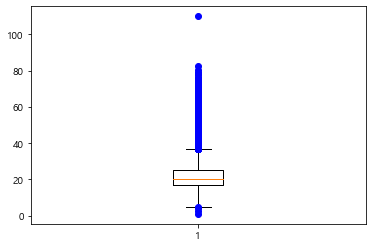

In [75]:
fig, ax = plt.subplots()
ax.boxplot([df['totalDamageTakenPerTime']], sym = 'bo') 
plt.show()

In [76]:
df['physicalDamageDealtToChampionsPerTime_log'] = np.log1p(df['physicalDamageDealtToChampionsPerTime'])
df['magicDamageDealtToChampionsPerTime_log'] = np.log1p(df['magicDamageDealtToChampionsPerTime'])
df['trueDamageDealtToChampionsPerTime_log'] = np.log1p(df['trueDamageDealtToChampionsPerTime'])
df['totalDamageTakenPerTime_log'] = np.log1p(df['totalDamageTakenPerTime'])

df

matchId  win  championName_Aatrox  championName_Ahri  \
0      KR_4870274470    0                  0.0                0.0   
1      KR_4870274470    1                  0.0                0.0   
2      KR_4901175026    0                  0.0                0.0   
3      KR_4901175026    1                  0.0                0.0   
4      KR_4944273316    0                  0.0                0.0   
...              ...  ...                  ...                ...   
51293  KR_5560972397    1                  0.0                0.0   
51294  KR_5560981091    0                  0.0                0.0   
51295  KR_5560981091    1                  0.0                0.0   
51296  KR_5560981811    0                  0.0                0.0   
51297  KR_5560981811    1                  0.0                0.0   

       championName_Akali  championName_Akshan  championName_Alistar  \
0                     0.0                  0.0                   0.0   
1                     0.0                  0.0                   0.0   
2                     0.0                  0.0                   0.0   
3                     0.2                  0.0                   0.0   
4                     0.0                  0.0                   0.2   
...                   ...                  ...                   ...   
51293                 0.0                  0.0                   0.0   
51294                 0.0                  0.0                   0.0   
51295                 0.0                  0.0                   0.0   
51296                 0.0                  0.0                   0.2   
51297                 0.0                  0.0                   0.0   

       championName_Amumu  championName_Anivia  championName_Annie  ...  \
0                     0.0                  0.0                 0.0  ...   
1                     0.0                  0.0                 0.0  ...   
2                     0.0                  0.0                 0.0  ...   
3                     0.0                  0.0                 0.0  ...   
4                     0.0                  0.0                 0.0  ...   
...                   ...                  ...                 ...  ...   
51293                 0.2                  0.0                 0.0  ...   
51294                 0.0                  0.0                 0.0  ...   
51295                 0.0                  0.0                 0.0  ...   
51296                 0.0                  0.0                 0.0  ...   
51297                 0.0                  0.0                 0.0  ...   

       championName_Zyra  teamId  physicalDamageDealtToChampionsPerTime  \
0                    0.0     200                               6.780758   
1                    0.0     100                              10.628426   
2                    0.0     100                               4.162932   
3                    0.0     200                               5.937483   
4                    0.0     100                               4.805683   
...                  ...     ...                                    ...   
51293                0.0     200                               9.928962   
51294                0.0     200                               4.019429   
51295                0.0     100                               8.548952   
51296                0.0     200                               2.232054   
51297                0.0     100                               4.597313   

       magicDamageDealtToChampionsPerTime  trueDamageDealtToChampionsPerTime  \
0                               19.412828                           1.090233   
1                               12.233673                           2.085131   
2                                5.258645                           0.506501   
3                                6.063347                           0.877547   
4                                3.156022                           1.564276   
...                                  

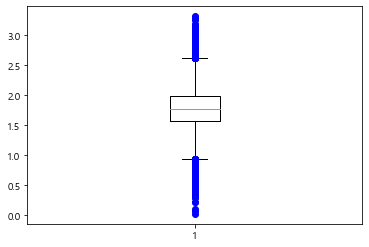

In [77]:
# 잘되었나 확인
fig, ax = plt.subplots()
ax.boxplot([df['physicalDamageDealtToChampionsPerTime_log']], sym = 'bo') 
plt.show()

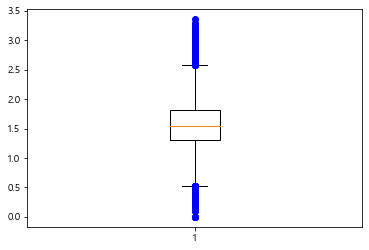

In [78]:
fig, ax = plt.subplots()
ax.boxplot([df['magicDamageDealtToChampionsPerTime_log']], sym = 'bo') 
plt.show()

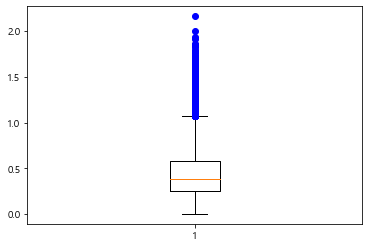

In [79]:
fig, ax = plt.subplots()
ax.boxplot([df['trueDamageDealtToChampionsPerTime_log']], sym = 'bo') 
plt.show()

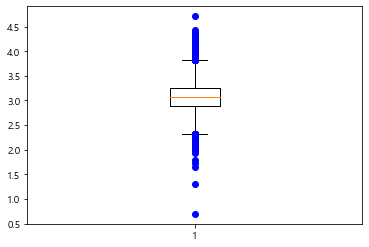

In [80]:
fig, ax = plt.subplots()
ax.boxplot([df['totalDamageTakenPerTime_log']], sym = 'bo') 
plt.show()

In [81]:
# 아웃라이어 drop
df2 = df.query('totalDamageTakenPerTime_log >= 1').reset_index(drop=True)
df2

matchId  win  championName_Aatrox  championName_Ahri  \
0      KR_4870274470    0                  0.0                0.0   
1      KR_4870274470    1                  0.0                0.0   
2      KR_4901175026    0                  0.0                0.0   
3      KR_4901175026    1                  0.0                0.0   
4      KR_4944273316    0                  0.0                0.0   
...              ...  ...                  ...                ...   
51292  KR_5560972397    1                  0.0                0.0   
51293  KR_5560981091    0                  0.0                0.0   
51294  KR_5560981091    1                  0.0                0.0   
51295  KR_5560981811    0                  0.0                0.0   
51296  KR_5560981811    1                  0.0                0.0   

       championName_Akali  championName_Akshan  championName_Alistar  \
0                     0.0                  0.0                   0.0   
1                     0.0                  0.0                   0.0   
2                     0.0                  0.0                   0.0   
3                     0.2                  0.0                   0.0   
4                     0.0                  0.0                   0.2   
...                   ...                  ...                   ...   
51292                 0.0                  0.0                   0.0   
51293                 0.0                  0.0                   0.0   
51294                 0.0                  0.0                   0.0   
51295                 0.0                  0.0                   0.2   
51296                 0.0                  0.0                   0.0   

       championName_Amumu  championName_Anivia  championName_Annie  ...  \
0                     0.0                  0.0                 0.0  ...   
1                     0.0                  0.0                 0.0  ...   
2                     0.0                  0.0                 0.0  ...   
3                     0.0                  0.0                 0.0  ...   
4                     0.0                  0.0                 0.0  ...   
...                   ...                  ...                 ...  ...   
51292                 0.2                  0.0                 0.0  ...   
51293                 0.0                  0.0                 0.0  ...   
51294                 0.0                  0.0                 0.0  ...   
51295                 0.0                  0.0                 0.0  ...   
51296                 0.0                  0.0                 0.0  ...   

       championName_Zyra  teamId  physicalDamageDealtToChampionsPerTime  \
0                    0.0     200                               6.780758   
1                    0.0     100                              10.628426   
2                    0.0     100                               4.162932   
3                    0.0     200                               5.937483   
4                    0.0     100                               4.805683   
...                  ...     ...                                    ...   
51292                0.0     200                               9.928962   
51293                0.0     200                               4.019429   
51294                0.0     100                               8.548952   
51295                0.0     200                               2.232054   
51296                0.0     100                               4.597313   

       magicDamageDealtToChampionsPerTime  trueDamageDealtToChampionsPerTime  \
0                               19.412828                           1.090233   
1                               12.233673                           2.085131   
2                                5.258645                           0.506501   
3                                6.063347                           0.877547   
4                                3.156022                           1.564276   
...                                  

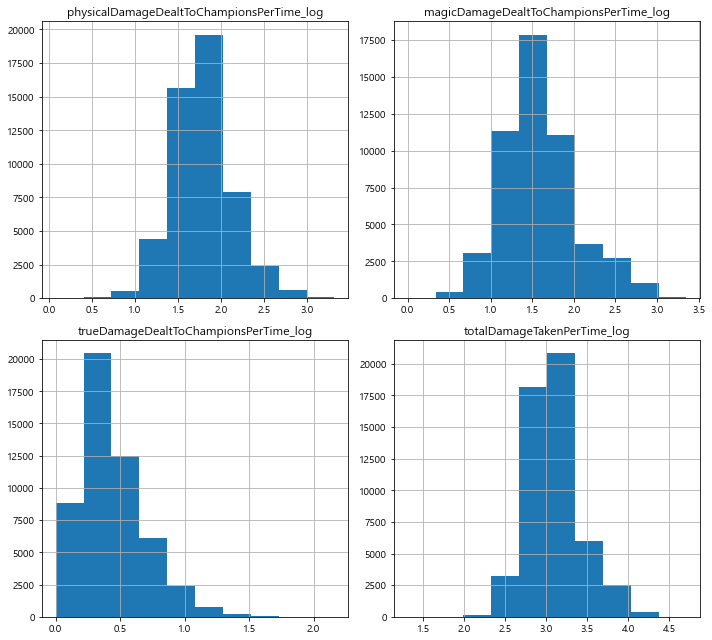

In [82]:
df2[['physicalDamageDealtToChampionsPerTime_log',
       'magicDamageDealtToChampionsPerTime_log',
       'trueDamageDealtToChampionsPerTime_log',
        'totalDamageTakenPerTime_log']].hist(figsize=(10,9))
plt.tight_layout()
plt.show()

# GMM 

In [83]:
# 분석에 사용할 값을 정규 분포로 스케일링
from sklearn.cluster import KMeans # K-Means
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계수 계산
from sklearn.preprocessing import StandardScaler

X_features = df2[['physicalDamageDealtToChampionsPerTime_log',
       'magicDamageDealtToChampionsPerTime_log',
       'trueDamageDealtToChampionsPerTime_log',
        'totalDamageTakenPerTime_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

In [50]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [65]:
# 분석에 사용할 값을 정규 분포로 스케일링
from sklearn.cluster import KMeans # K-Means
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계수 계산
from sklearn.preprocessing import StandardScaler

X_features = df2[['physicalDamageDealtToChampionsPerTime_log',
       'magicDamageDealtToChampionsPerTime_log',
       'trueDamageDealtToChampionsPerTime_log',
        'totalDamageTakenPerTime_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

In [84]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=0).fit(X_features_scaled)
gmm_cluster_labels = gmm.predict(X_features_scaled)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
df2['gmm_cluster'] = gmm_cluster_labels

df2.groupby('gmm_cluster')[['matchId']].count()

matchId
gmm_cluster         
0              14551
1               7127
2              16591
3              13028

In [85]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0).fit(X_features_scaled)
kmeans_cluster_labels = kmeans.predict(X_features_scaled)
df2['kmeans_cluster'] = kmeans_cluster_labels

df2.groupby('kmeans_cluster')[['matchId']].count()

matchId
kmeans_cluster         
0                 17082
1                 16643
2                 11066
3                  6506

In [86]:
df2

matchId  win  championName_Aatrox  championName_Ahri  \
0      KR_4870274470    0                  0.0                0.0   
1      KR_4870274470    1                  0.0                0.0   
2      KR_4901175026    0                  0.0                0.0   
3      KR_4901175026    1                  0.0                0.0   
4      KR_4944273316    0                  0.0                0.0   
...              ...  ...                  ...                ...   
51292  KR_5560972397    1                  0.0                0.0   
51293  KR_5560981091    0                  0.0                0.0   
51294  KR_5560981091    1                  0.0                0.0   
51295  KR_5560981811    0                  0.0                0.0   
51296  KR_5560981811    1                  0.0                0.0   

       championName_Akali  championName_Akshan  championName_Alistar  \
0                     0.0                  0.0                   0.0   
1                     0.0                  0.0                   0.0   
2                     0.0                  0.0                   0.0   
3                     0.2                  0.0                   0.0   
4                     0.0                  0.0                   0.2   
...                   ...                  ...                   ...   
51292                 0.0                  0.0                   0.0   
51293                 0.0                  0.0                   0.0   
51294                 0.0                  0.0                   0.0   
51295                 0.0                  0.0                   0.2   
51296                 0.0                  0.0                   0.0   

       championName_Amumu  championName_Anivia  championName_Annie  ...  \
0                     0.0                  0.0                 0.0  ...   
1                     0.0                  0.0                 0.0  ...   
2                     0.0                  0.0                 0.0  ...   
3                     0.0                  0.0                 0.0  ...   
4                     0.0                  0.0                 0.0  ...   
...                   ...                  ...                 ...  ...   
51292                 0.2                  0.0                 0.0  ...   
51293                 0.0                  0.0                 0.0  ...   
51294                 0.0                  0.0                 0.0  ...   
51295                 0.0                  0.0                 0.0  ...   
51296                 0.0                  0.0                 0.0  ...   

       physicalDamageDealtToChampionsPerTime  \
0                                   6.780758   
1                                  10.628426   
2                                   4.162932   
3                                   5.937483   
4                                   4.805683   
...                                      ...   
51292                               9.928962   
51293                               4.019429   
51294                               8.548952   
51295                               2.232054   
51296                               4.597313   

       magicDamageDealtToChampionsPerTime  trueDamageDealtToChampionsPerTime  \
0                               19.412828                           1.090233   
1                               12.233673                           2.085131   
2                                5.258645                           0.506501   
3                                6.063347                           0.877547   
4                                3.156022                           1.564276   
...                                   ...                                ...   
51292                           11.045355                           2.900000   
51293                            3.046222                           0.868444   
51294                            2.311492                           0.369143   
51295                            3.494242

In [87]:
# 모형 구축에 사용된 로그 변수 제거
df3 = df2.drop(['physicalDamageDealtToChampionsPerTime_log',
       'magicDamageDealtToChampionsPerTime_log',
       'trueDamageDealtToChampionsPerTime_log',
       'totalDamageTakenPerTime_log'], axis = 1, inplace = False)

In [88]:
clustering_result = df3.groupby('kmeans_cluster').mean()
clustering_result

win  championName_Aatrox  championName_Ahri  \
kmeans_cluster                                                     
0               0.550404             0.011755           0.000820   
1               0.377877             0.009794           0.002463   
2               0.588198             0.006000           0.006705   
3               0.533200             0.007532           0.007685   

                championName_Akali  championName_Akshan  championName_Alistar  \
kmeans_cluster                                                                  
0                         0.007095             0.008067              0.005257   
1                         0.005924             0.007679              0.004711   
2                         0.005042             0.007663              0.005350   
3                         0.008039             0.006625              0.006210   

                championName_Amumu  championName_Anivia  championName_Annie  \
kmeans_cluster                                                                
0                         0.005292             0.003536            0.000972   
1                         0.005576             0.002992            0.001045   
2                         0.008603             0.003000            0.000723   
3                         0.007593             0.003351            0.003566   

                championName_Aphelios  ...  championName_Ziggs  \
kmeans_cluster                         ...                       
0                            0.020525  ...            0.008149   
1                            0.021703  ...            0.006417   
2                            0.017947  ...            0.004067   
3                            0.006886  ...            0.007624   

                championName_Zilean  championName_Zoe  championName_Zyra  \
kmeans_cluster                                                             
0                          0.003594          0.005971           0.001745   
1                          0.003533          0.009662           0.001286   
2                          0.003018          0.014133           0.001084   
3                          0.006056          0.007685           0.003873   

                    teamId  physicalDamageDealtToChampionsPerTime  \
kmeans_cluster                                                      
0               150.076104                               5.366300   
1               150.129183                               3.640956   
2               149.674679                               5.737754   
3               149.715647                               9.000762   

                magicDamageDealtToChampionsPerTime  \
kmeans_cluster                                       
0                                         4.640554   
1                                         2.689763   
2                                         3.583980   
3                                        10.059074   

                trueDamageDealtToChampionsPerTime  totalDamageTakenPerTime  \
kmeans_cluster                                                               
0                                        0.395780                22.263603   
1                                        0.337065                15.818836   
2                                        1.012422                22.292798   
3                                        1.186261                39.085900   

                gmm_cluster  
kmeans_cluster               
0                  1.932209  
1                  0.421258  
2                  2.923098  
3                  1.080387  

[4 rows x 164 columns]

In [89]:
clustering_result = df3.groupby('gmm_cluster').mean()
clustering_result

win  championName_Aatrox  championName_Ahri  \
gmm_cluster                                                     
0            0.382242             0.009951           0.002185   
1            0.535850             0.007044           0.007212   
2            0.534145             0.012959           0.000422   
3            0.570003             0.005312           0.006831   

             championName_Akali  championName_Akshan  championName_Alistar  \
gmm_cluster                                                                  
0                      0.005580             0.008068              0.004591   
1                      0.007815             0.006160              0.005977   
2                      0.006871             0.008245              0.005401   
3                      0.005910             0.007323              0.005281   

             championName_Amumu  championName_Anivia  championName_Annie  \
gmm_cluster                                                                
0                      0.005773             0.002886            0.001017   
1                      0.006988             0.003480            0.003704   
2                      0.004894             0.003508            0.000808   
3                      0.008658             0.003086            0.000814   

             championName_Aphelios  ...  championName_Ziggs  \
gmm_cluster                         ...                       
0                         0.021937  ...            0.005979   
1                         0.006903  ...            0.008727   
2                         0.021795  ...            0.007594   
3                         0.017286  ...            0.005020   

             championName_Zilean  championName_Zoe  championName_Zyra  \
gmm_cluster                                                             
0                       0.003491          0.009718           0.001265   
1                       0.006342          0.007661           0.004209   
2                       0.003363          0.004942           0.001495   
3                       0.003162          0.014676           0.001167   

                 teamId  physicalDamageDealtToChampionsPerTime  \
gmm_cluster                                                      
0            149.701051                               3.693586   
1            149.452785                               8.662410   
2            150.515340                               5.353849   
3            149.823457                               5.373689   

             magicDamageDealtToChampionsPerTime  \
gmm_cluster                                       
0                                      2.610999   
1                                     10.156881   
2                                      4.306448   
3                                      3.631510   

             trueDamageDealtToChampionsPerTime  totalDamageTakenPerTime  \
gmm_cluster                                                               
0                                     0.320614                15.618064   
1                                     1.100994                37.839881   
2                                     0.366324                22.003924   
3                                     0.974981                21.688236   

             kmeans_cluster  
gmm_cluster                  
0                  0.958010  
1                  2.645713  
2                  0.153999  
3                  1.760976  

[4 rows x 164 columns]

In [90]:
# 변수명 변경
df3.loc[(df3.gmm_cluster == 0), 'gmm_cluster'] = '1번'
df3.loc[(df3.gmm_cluster == 1), 'gmm_cluster'] = '2번'
df3.loc[(df3.gmm_cluster == 2), 'gmm_cluster'] = '3번'
df3.loc[(df3.gmm_cluster == 3), 'gmm_cluster'] = '4번'

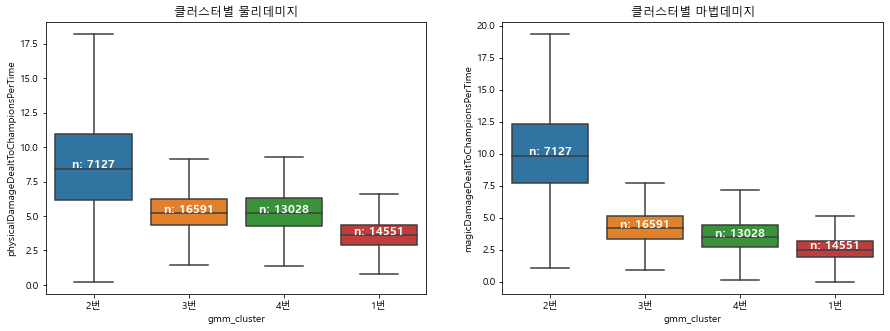

In [91]:
# 클러스터별 데미지 시각화

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='gmm_cluster',y='physicalDamageDealtToChampionsPerTime',data=df3, showfliers=False)

# 중앙값
medians = df3.groupby(['gmm_cluster'])['physicalDamageDealtToChampionsPerTime'].median().to_dict()

# 관측수
nobs = df3['gmm_cluster'].value_counts().to_dict()

#키 값을 'n:'값 형식으로 변환
for key in nobs:
    nobs[key]="n: " +str(nobs[key])
    
#그래프의 Xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment='center', size='large',color='w', weight='semibold')
    
ax.set_title('클러스터별 물리데미지')

plt.subplot(1,2,2)
ax = sns.boxplot(x='gmm_cluster',y='magicDamageDealtToChampionsPerTime',data=df3, showfliers=False)

# 중앙값
medians = df3.groupby(['gmm_cluster'])['magicDamageDealtToChampionsPerTime'].median().to_dict()

# 관측수
nobs = df3['gmm_cluster'].value_counts().to_dict()

#키 값을 'n:'값 형식으로 변환
for key in nobs:
    nobs[key]="n: " +str(nobs[key])
    
#그래프의 Xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment='center', size='large',color='w', weight='semibold')
    
ax.set_title('클러스터별 마법데미지')
plt.show()

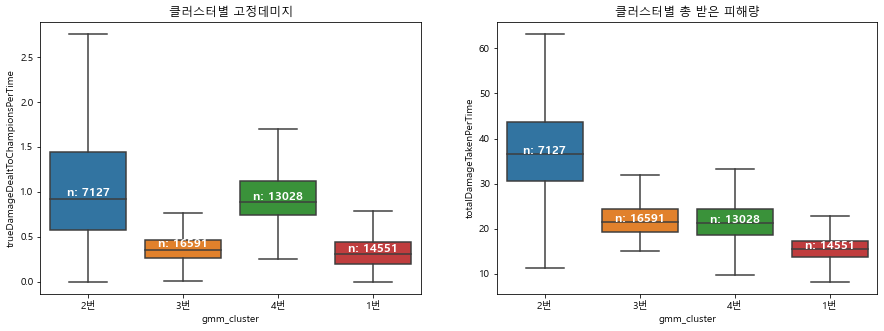

In [92]:
# 고정데미지
# 총 받은 데미지

# 클러스터별 데미지 시각화

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='gmm_cluster',y='trueDamageDealtToChampionsPerTime',data=df3, showfliers=False)

# 중앙값
medians = df3.groupby(['gmm_cluster'])['trueDamageDealtToChampionsPerTime'].median().to_dict()

# 관측수
nobs = df3['gmm_cluster'].value_counts().to_dict()

#키 값을 'n:'값 형식으로 변환
for key in nobs:
    nobs[key]="n: " +str(nobs[key])
    
#그래프의 Xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment='center', size='large',color='w', weight='semibold')
    
ax.set_title('클러스터별 고정데미지')

plt.subplot(1,2,2)
ax = sns.boxplot(x='gmm_cluster',y='totalDamageTakenPerTime',data=df3, showfliers=False)

# 중앙값
medians = df3.groupby(['gmm_cluster'])['totalDamageTakenPerTime'].median().to_dict()

# 관측수
nobs = df3['gmm_cluster'].value_counts().to_dict()

#키 값을 'n:'값 형식으로 변환
for key in nobs:
    nobs[key]="n: " +str(nobs[key])
    
#그래프의 Xticks text값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

#tick은 tick 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment='center', size='large',color='w', weight='semibold')
    
ax.set_title('클러스터별 총 받은 피해량')
plt.show()


In [96]:
clustering_result.to_csv('gmm_result.csv')